In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cpudata.csv')
data.head()

,time(s),rank-worker,number-of-nodes,algorithm,thing-measured
0,1.925907,0,1,CPU-naive,init-A-B-C
1,0.071962,0,1,CPU-naive,compute-col-block-B
2,0.000001,0,1,CPU-naive,get-ready-allgatherv
3,0.085323,0,1,CPU-naive,perform-allgatherv
4,725.593634,0,1,CPU-naive,compute-block-C-result


In [3]:
# Group by 'algorithm', 'number-of-nodes', and 'thing-measured'
grouped_data = data.groupby(['algorithm', 'number-of-nodes', 'thing-measured'])

# Calculate average_time and total_time for each group
result = grouped_data.agg(average_time=('time(s)', 'mean'),
                          sd = ('time(s)', "std"),
                          min_time=('time(s)', 'min'),
                          max_time=('time(s)', 'max'),
                          ).reset_index()

# Calculate average_times_number_of_nodes
result['average_times_number_of_nodes'] = result['average_time'] * result['number-of-nodes'] 
# The initialization is done outside the loop
result.loc[result['thing-measured'] == 'init-A-B-C', 'average_times_number_of_nodes'] = result['average_times_number_of_nodes'] / result['number-of-nodes']


Let's have a look at the data we have collected:

In [4]:
result

,algorithm,number-of-nodes,thing-measured,average_time,sd,min_time,max_time,average_times_number_of_nodes
0,CPU-OpenBLAS,1,compute-block-C-result,3.735099,1.517677e-03,3.734070,3.736842,3.735099
1,CPU-OpenBLAS,1,compute-col-block-B,0.071857,6.242596e-05,0.071818,0.071929,0.071857
2,CPU-OpenBLAS,1,get-ready-allgatherv,0.000002,5.773503e-07,0.000001,0.000002,0.000002
3,CPU-OpenBLAS,1,init-A-B-C,1.928681,2.698172e-04,1.928378,1.928896,1.928681
4,CPU-OpenBLAS,1,perform-allgatherv,0.085180,7.300228e-05,0.085107,0.085253,0.085180
5,CPU-OpenBLAS,2,compute-block-C-result,0.944830,2.509088e-03,0.941792,0.949088,1.889660
6,CPU-OpenBLAS,2,compute-col-block-B,0.019786,4.982073e-04,0.018600,0.020146,0.039573
7,CPU-OpenBLAS,2,get-ready-allgatherv,0.000003,4.629100e-07,0.000002,0.000003,0.000005
8,CPU-OpenBLAS,2,init-A-B-C,0.969519,7.468648e-04,0.968642,0.970245,0.969519
9,CPU-OpenBLAS,2,perform-allgatherv,0.059011,1.568550e-02,0.043933,0.084821,0.118022


### 1. CPU Utilization, "naive" algorithm

In [5]:
# Extract the data for the CPU-naive algorithm
cpu_naive = result[result['algorithm'] == 'CPU-naive']
# extract only the 3 needed columns
extracted = cpu_naive[['number-of-nodes', 'average_times_number_of_nodes', 'thing-measured']]
extracted.reset_index(drop=True, inplace=True)

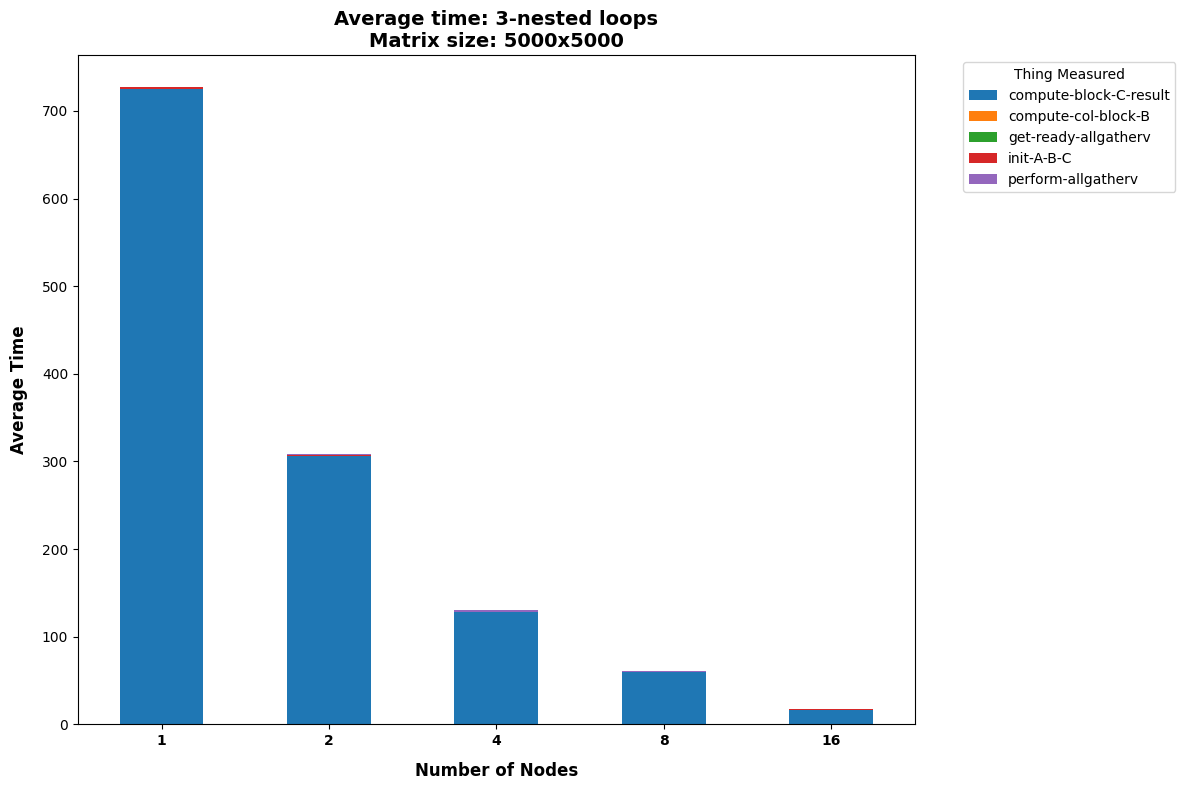

In [6]:
import matplotlib.pyplot as plt

# Pivot the DataFrame to have 'thing-measured' as columns, needed for the stacked bar chart
pivot_df = extracted.pivot(index='number-of-nodes', columns='thing-measured', values='average_times_number_of_nodes')

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customizing tick labels and title
ax.set_xlabel('Number of Nodes', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Average Time', fontsize=12, fontweight='bold', labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Rotate x-axis tick labels to 0 degrees
ax.set_title('Average time: 3-nested loops\nMatrix size: 5000x5000', fontsize=14, fontweight='bold')

# Customizing tick parameters
plt.xticks(fontsize=10, fontweight='bold') # Increase tick label size and make them bold

# Adding legend
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Since the time needed to compute the partial block of `C` by each process is two orders of magnitude bigger than the rest of operations, let's have a look at the same plot removeing it. This way we can see the rest of the operations more clearly:

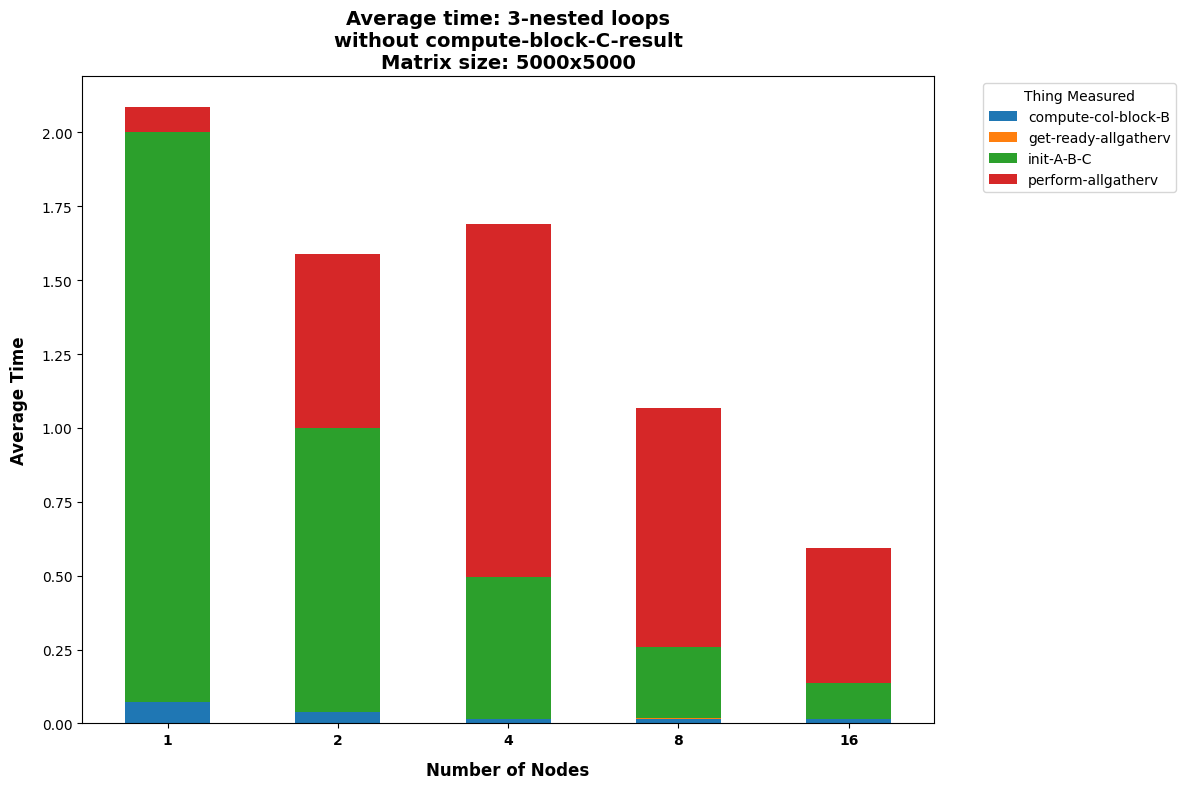

In [7]:
extracted_no_compute_C = extracted[extracted['thing-measured'] != 'compute-block-C-result']

pivot_df_no_compute_C = extracted_no_compute_C.pivot(index='number-of-nodes', columns='thing-measured', values='average_times_number_of_nodes')

ax = pivot_df_no_compute_C.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_xlabel('Number of Nodes', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Average Time', fontsize=12, fontweight='bold', labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Average time: 3-nested loops\nwithout compute-block-C-result\nMatrix size: 5000x5000', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 2. CPU Utilization, using the `openBLAS` library

In [8]:
cpu_blas = result[result['algorithm'] == 'CPU-OpenBLAS']
extracted_blas = cpu_blas[['number-of-nodes', 'average_times_number_of_nodes', 'thing-measured']]
extracted_blas.reset_index(drop=True, inplace=True)

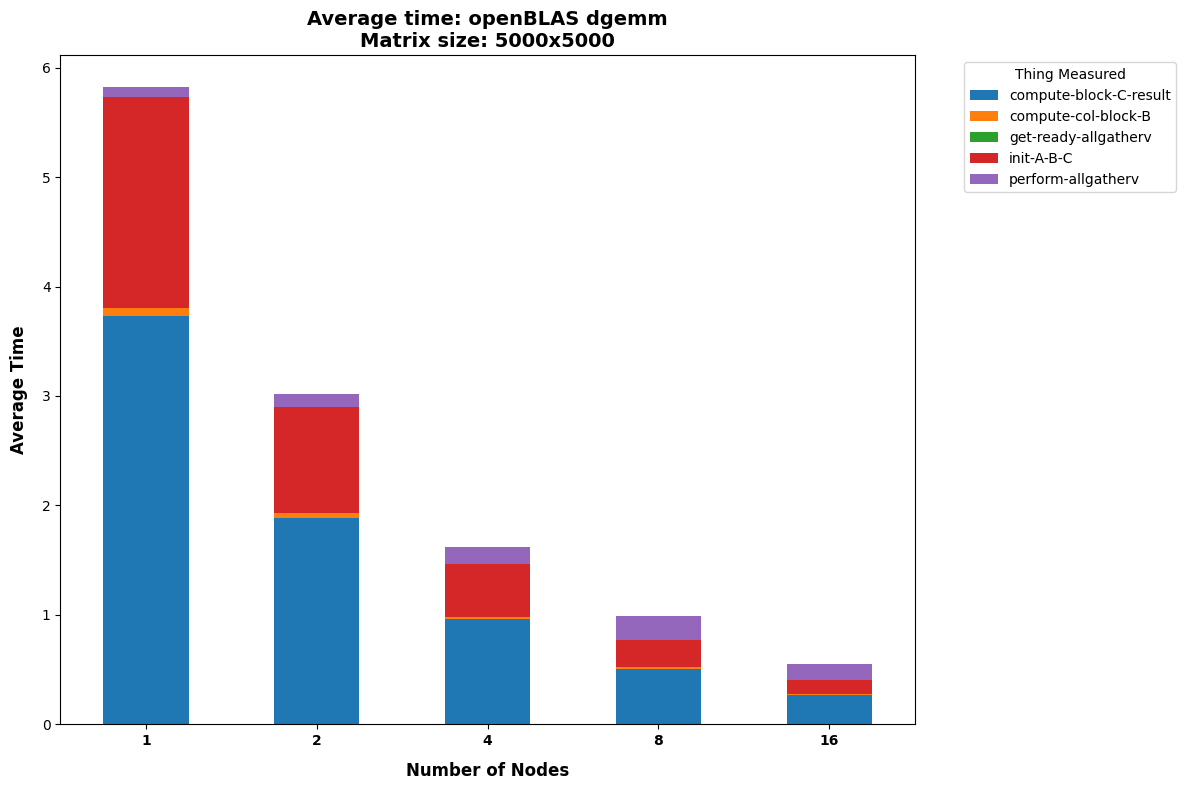

In [9]:
# plot 
pivot_df_blas = extracted_blas.pivot(index='number-of-nodes', columns='thing-measured', values='average_times_number_of_nodes')

ax = pivot_df_blas.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_xlabel('Number of Nodes', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Average Time', fontsize=12, fontweight='bold', labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Average time: openBLAS dgemm\nMatrix size: 5000x5000', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. 1  Naive algorithm with `openBLAS`

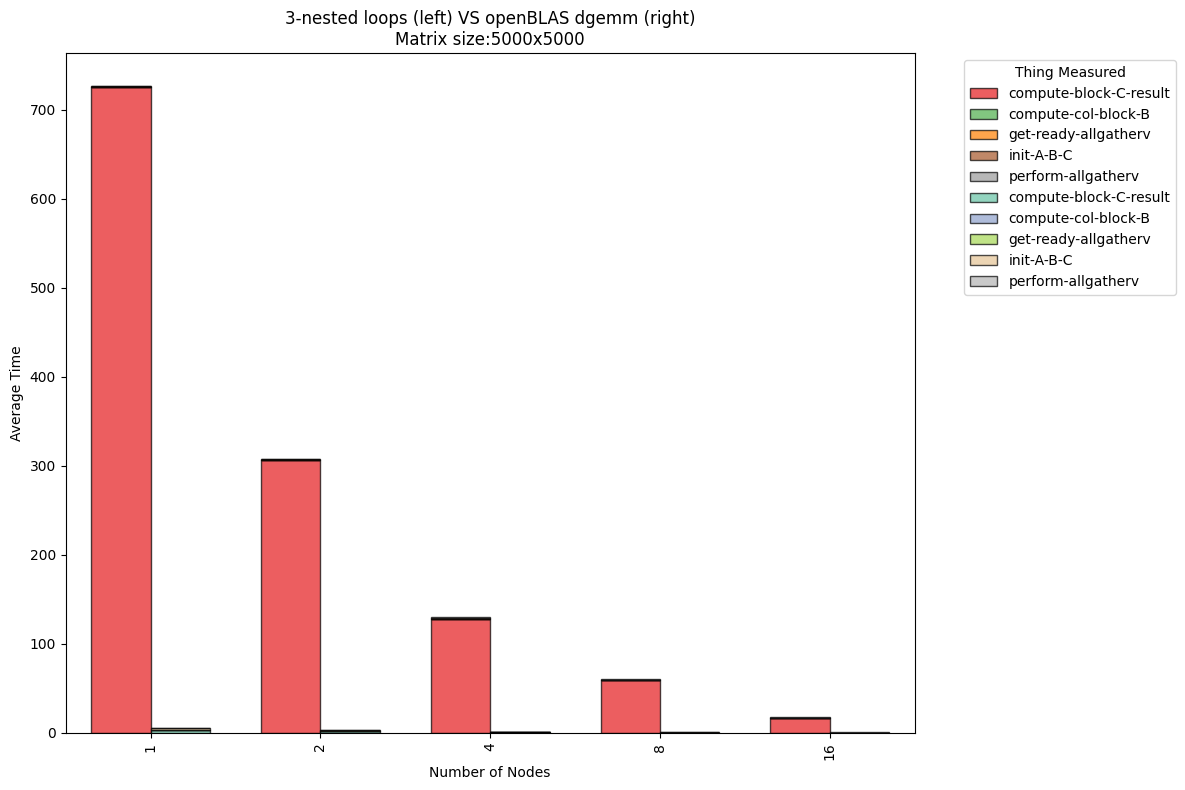

In [10]:
# Create DataFrames
df_naive = pd.DataFrame(extracted)
df_openblas = pd.DataFrame(extracted_blas)

# Pivot the DataFrames to have 'thing-measured' as columns
pivot_df_naive = df_naive.pivot(index='number-of-nodes', columns='thing-measured', values='average_times_number_of_nodes')
pivot_df_openblas = df_openblas.pivot(index='number-of-nodes', columns='thing-measured', values='average_times_number_of_nodes')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
pivot_df_naive.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=1, colormap='Set1', alpha=0.7, edgecolor='black')
pivot_df_openblas.plot(kind='bar', stacked=True, ax=ax, width=0.35, position=0, colormap='Set2', legend=None, alpha=0.7, edgecolor='black')

plt.xlim(-0.5,4.5)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Time')
plt.title('3-nested loops (left) VS openBLAS dgemm (right)\nMatrix size:5000x5000')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Since the comparison is such hard to see, let's consider the log of the time spent in each operation:

In [11]:
log_naive = extracted.loc[extracted['thing-measured'] == 'compute-block-C-result'].copy()
log_naive['log_time'] = np.log(log_naive['average_times_number_of_nodes'])
log_naive.reset_index(drop=True, inplace=True)

log_blas = extracted_blas.loc[extracted_blas['thing-measured'] == 'compute-block-C-result'].copy()
log_blas['log_time'] = np.log(log_blas['average_times_number_of_nodes'])
log_blas.reset_index(drop=True, inplace=True)

min_value = min(log_naive['log_time'].min(), log_blas['log_time'].min())
# add min_value+0.01 to avoid negative values
log_naive['log_time'] = log_naive['log_time'] - min_value + 0.01
log_blas['log_time'] = log_blas['log_time'] - min_value + 0.01

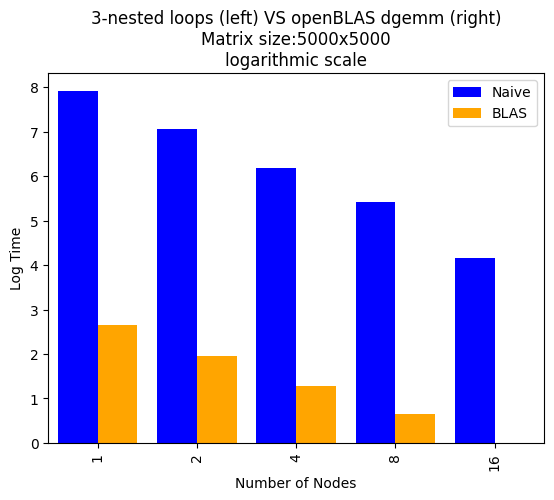

In [12]:
fig, ax = plt.subplots()

# Plot the data
log_naive.plot(x='number-of-nodes', y='log_time', kind='bar', color='blue', ax=ax, position=1, width=0.4, label='Naive')
log_blas.plot(x='number-of-nodes', y='log_time', kind='bar', color='orange', ax=ax, position=0, width=0.4, label='BLAS')

# Set labels and title
plt.xlabel('Number of Nodes')
plt.ylabel('Log Time')
plt.title('3-nested loops (left) VS openBLAS dgemm (right)\nMatrix size:5000x5000\nlogarithmic scale')
plt.legend()
plt.xlim(-0.5, len(log_naive) - 0.5)
# Show plot
plt.show()

## 3. GPU Utilization

First of all I've tried to use one node with the same matrix size (5000) that I use in the previous computation. 

***Remark***: Since there were two order of magnitudes of difference with respect to the openBLAS implementation, I decided to use a bigger matrix (75,000 x 75,000) to see how the GPU implementation behaves scaling the number of nodes.

**remark**: I've recycled some code which calls "`number-of-nodes`" the number of mpi processes. Since in this case I put 4 processes per node (because each node has 4 GPUS), hence I the actual number of node is the number displayed divided by 4

In [13]:
# load the data:298
gpu5k = pd.read_csv('gpudata5k.csv')
gpu75k = pd.read_csv('gpudata75k.csv')

In [14]:
# have a look at the data
gpu5k.head()

,time(s),rank-worker,number-of-nodes,algorithm,thing-measured
0,0.454187,1,4,GPU-Cuda,init-A-B-C
1,0.006418,1,4,GPU-Cuda,Copy-A-and-C-to-device
2,0.026767,1,4,GPU-Cuda,compute-col-block-B
3,0.000001,1,4,GPU-Cuda,get-ready-allgatherv
4,0.045093,1,4,GPU-Cuda,perform-allgatherv


In [15]:
grouped_data_gpu5k = gpu5k.groupby(['algorithm', 'number-of-nodes', 'thing-measured'])

# Calculate average_time and total_time for each group
result_gpu5k = grouped_data_gpu5k.agg(average_time=('time(s)', 'mean'),
                          sd = ('time(s)', "std"),
                          min_time=('time(s)', 'min'),
                          max_time=('time(s)', 'max'),
                          ).reset_index()

# divide by 4 to get the number of nodes
result_gpu5k['number-of-nodes'] = result_gpu5k['number-of-nodes'] / 4
# Calculate average_times_number_of_nodes
result_gpu5k['average_times_number_of_nodes'] = result_gpu5k['average_time'] * result_gpu5k['number-of-nodes']
# The initialization is done outside the loop
result_gpu5k.loc[result_gpu5k['thing-measured'] == 'init-A-B-C', 'average_times_number_of_nodes'] = result_gpu5k['average_times_number_of_nodes'] / result_gpu5k['number-of-nodes']
result_gpu5k.loc[result_gpu5k['thing-measured'] == 'copy-A-and-C-to-device', 'average_times_number_of_nodes'] = result_gpu5k['average_times_number_of_nodes'] / result_gpu5k['number-of-nodes']
# Wrong prints, at the end the implementation changed and only A was copied to the device, hence change the label
result_gpu5k.loc[result_gpu5k['thing-measured'] == 'copy-A-and-C-to-device', 'thing-measured'] = 'copy-A-to-device'

In [16]:
extracted_gpu5k = result_gpu5k[['number-of-nodes', 'average_times_number_of_nodes', 'thing-measured']]
extracted_gpu5k.reset_index(drop=True, inplace=True)

In [17]:
# To make comparison
df_openblas_1node = extracted_blas[extracted_blas['number-of-nodes'] == 1]
df_openblas_8nodes = extracted_blas[extracted_blas['number-of-nodes'] == 8]
df_naive_16nodes = extracted[extracted['number-of-nodes'] == 16]


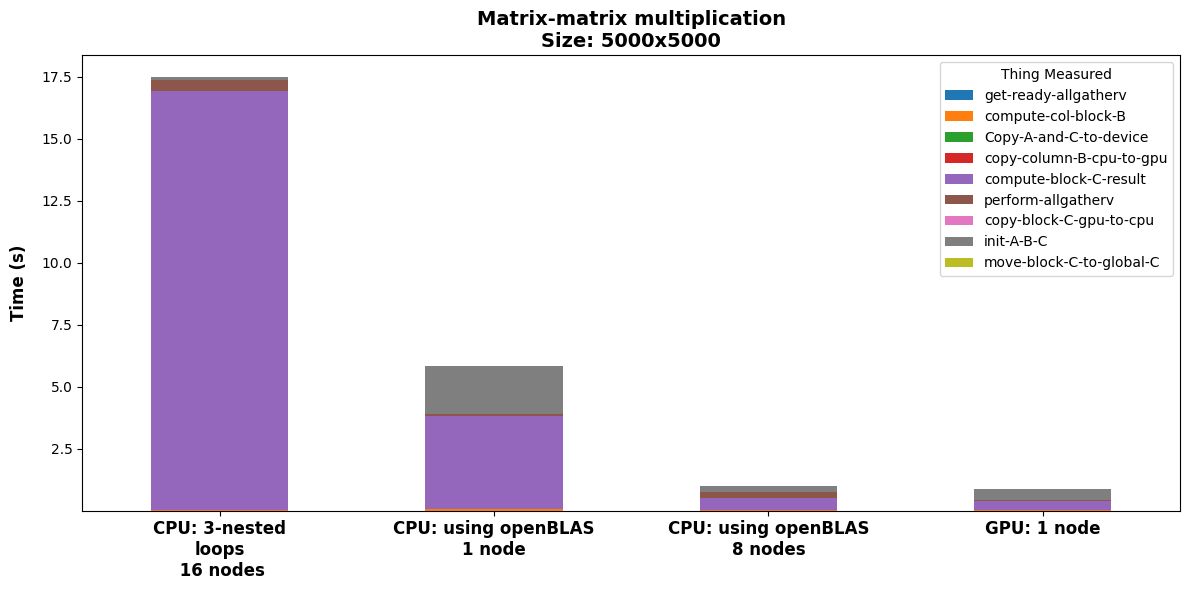

In [18]:
# Plot 
unique_things = list(set(extracted_gpu5k['thing-measured']) | set(df_openblas_1node['thing-measured']) | set(df_naive_16nodes['thing-measured']))

# Summing up the average_times_number_of_nodes for each thing-measured in each dataframe
gpu_sum = extracted_gpu5k.groupby('thing-measured')['average_times_number_of_nodes'].sum()
blas1_sum = df_openblas_1node.groupby('thing-measured')['average_times_number_of_nodes'].sum()
blas8_sum = df_openblas_8nodes.groupby('thing-measured')['average_times_number_of_nodes'].sum()
naive_sum = df_naive_16nodes.groupby('thing-measured')['average_times_number_of_nodes'].sum()

# Creating a dataframe with the sums
sum_df = pd.DataFrame({
    'CPU: 3-nested\nloops\n 16 nodes': [naive_sum.get(thing, 0) for thing in unique_things],
    'CPU: using openBLAS\n1 node': [blas1_sum.get(thing, 0) for thing in unique_things],
    'CPU: using openBLAS\n8 nodes': [blas8_sum.get(thing, 0) for thing in unique_things],
    'GPU: 1 node': [gpu_sum.get(thing, 0) for thing in unique_things]
}, index=unique_things)

# Transpose the dataframe to swap rows and columns
sum_df = sum_df.transpose()

# Plotting the stacked bar chart
sum_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Matrix-matrix multiplication\nSize: 5000x5000', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Time (s)', fontsize=12, fontweight='bold', labelpad=10)
plt.legend(title='Thing Measured')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


Now let's consider a bigger matrix, and see how the algorithm behaves scaling the number of nodes

In [19]:
grouped_data_gpu75k = gpu75k.groupby(['algorithm', 'number-of-nodes', 'thing-measured'])

# Calculate average_time and total_time for each group
result_gpu75k = grouped_data_gpu75k.agg(average_time=('time(s)', 'mean'),
                          sd = ('time(s)', "std"),
                          min_time=('time(s)', 'min'),
                          max_time=('time(s)', 'max'),
                          ).reset_index()

# divide by 4 to get the number of nodes
result_gpu75k['number-of-nodes'] = result_gpu75k['number-of-nodes'] / 4
result_gpu75k['number-of-nodes'] = result_gpu75k['number-of-nodes'].astype(int)
# Calculate average_times_number_of_nodes
result_gpu75k['average_times_number_of_nodes'] = result_gpu75k['average_time'] * result_gpu75k['number-of-nodes']
# The initialization is done outside the loop
result_gpu75k.loc[result_gpu75k['thing-measured'] == 'init-A-B-C', 'average_times_number_of_nodes'] = result_gpu75k['average_times_number_of_nodes'] / result_gpu75k['number-of-nodes']
result_gpu75k.loc[result_gpu75k['thing-measured'] == 'copy-A-and-C-to-device', 'average_times_number_of_nodes'] = result_gpu75k['average_times_number_of_nodes'] / result_gpu75k['number-of-nodes']
# Wrong prints, at the end the implementation changed and only A was copied to the device, hence change the label
result_gpu75k.loc[result_gpu75k['thing-measured'] == 'copy-A-and-C-to-device', 'thing-measured'] = 'copy-A-to-device'

In [20]:
extracted_gpu75k = result_gpu75k[['number-of-nodes', 'average_times_number_of_nodes', 'thing-measured']]
extracted_gpu75k.reset_index(drop=True, inplace=True)

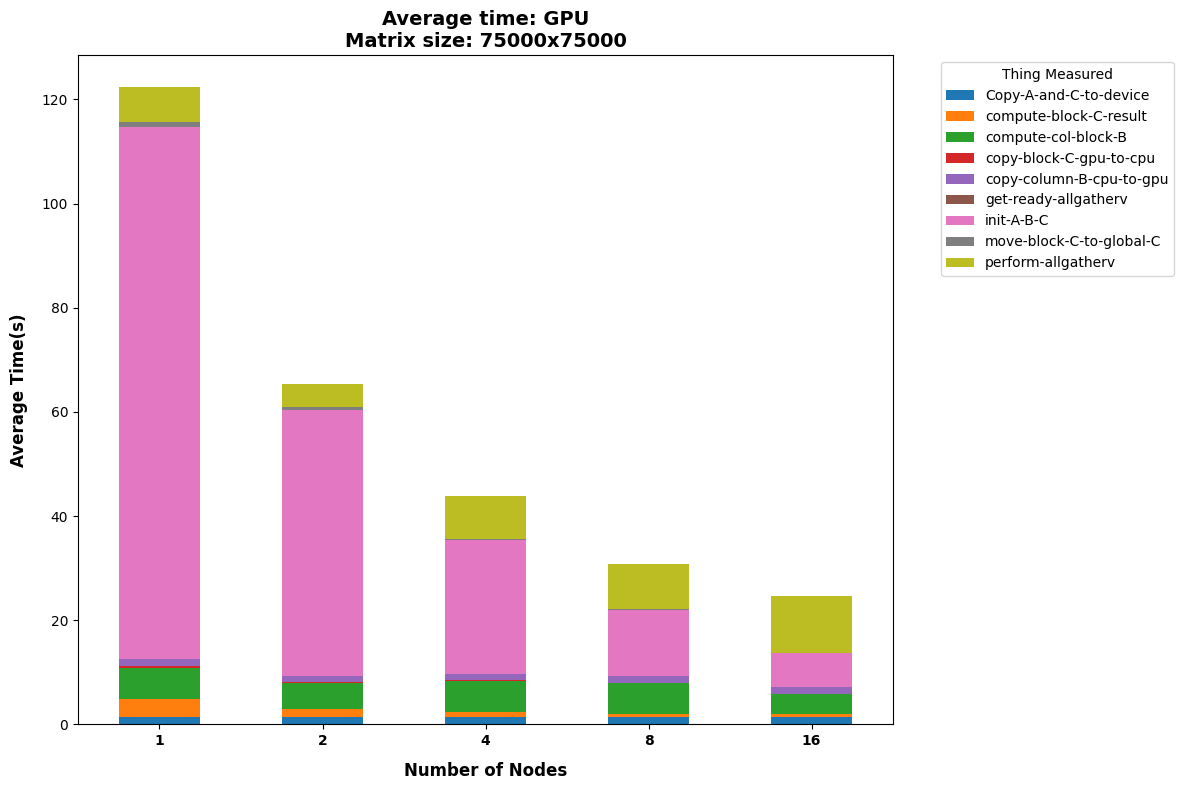

In [21]:
pivot_df_gpu75k = extracted_gpu75k.pivot(index='number-of-nodes', columns='thing-measured', values='average_times_number_of_nodes')

ax = pivot_df_gpu75k.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_xlabel('Number of Nodes', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Average Time(s)', fontsize=12, fontweight='bold', labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Average time: GPU\nMatrix size: 75000x75000', fontsize=14, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()